# 1. Import SQL, NumPy, pandas, Matplotlib for Python

In [57]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* Connect to the database file `movies.db` and use the file path `data/`.

In [58]:
conn = sqlite3.connect('data\movies.db')

# 2. Open the database file as a dataframe called `query`.

In addition, you will `JOIN` tables and `SELECT` all the rows below to get the information you need.

Since this is a `db` file, you will need to use `pd.read_sql` and input the SQL code to get the output below.

In [59]:
#Printing the query dataframe and filtering the rows I want to research further
query = pd.read_sql('''SELECT DISTINCT tconst, g.title, i.genres, g.studio,  g.year,
                       g.domestic_gross, g. foreign_gross
                       FROM bom_movie_gross as g
                       JOIN imdb_title_basics as i
                       ON g.title = i.primary_title
                       AND g.year = i.start_year''', conn)
query.head()

,tconst,title,genres,studio,year,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000


* Print out the dtypes for each column.

In [60]:
#Finding the dytpes of the dataframe
query.dtypes

tconst             object
title              object
genres             object
studio             object
year                int64
domestic_gross    float64
foreign_gross      object
dtype: object

# 3. Add a new column called `total_gross` to the dataframe.

In order to do this, the `foreign_gross` column will have to be converted from a string to an integer.

In [61]:
#Converting foreign_gross column from string to integer
query['foreign_gross'] = pd.to_numeric(query['foreign_gross'], errors = 'coerce')
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000.0
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000.0
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000.0
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000.0
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000.0
...,...,...,...,...,...,...,...
1868,tt7870578,Girls vs Gangsters,"Comedy,Drama",WGUSA,2018,37100.0,NaN
1869,tt7405478,The Workshop,Thriller,Strand,2018,22100.0,NaN
1870,tt6593240,A Paris Education,Drama,KL,2018,21600.0,NaN
1871,tt6523720,The Quake,"Action,Drama,Thriller",Magn.,2018,6200.0,NaN


* Print out the dtypes again.

In [62]:
query.dtypes

tconst             object
title              object
genres             object
studio             object
year                int64
domestic_gross    float64
foreign_gross     float64
dtype: object

Now that the `foreign_gross` column is an integer, you can create the `total_gross` column. 

In [63]:
#Adding total_gross column
query['total_gross'] = query['domestic_gross'] + query['foreign_gross']
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000.0,1.067000e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000.0,8.283000e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000.0,7.526000e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000.0,6.985000e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000.0,6.239000e+08
...,...,...,...,...,...,...,...,...
1868,tt7870578,Girls vs Gangsters,"Comedy,Drama",WGUSA,2018,37100.0,NaN,NaN
1869,tt7405478,The Workshop,Thriller,Strand,2018,22100.0,NaN,NaN
1870,tt6593240,A Paris Education,Drama,KL,2018,21600.0,NaN,NaN
1871,tt6523720,The Quake,"Action,Drama,Thriller",Magn.,2018,6200.0,NaN,NaN


# 4. Replace all NaN values to 0 in the `domestic_gross`, `foreign_gross`, and `total_gross` columns.

In [64]:
#Replace NaN values with 0
query['total_gross'] = query['total_gross'].fillna(0)
query['foreign_gross'] = query['foreign_gross'].fillna(0)
query['domestic_gross'] = query['domestic_gross'].fillna(0)
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000.0,1.067000e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000.0,8.283000e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000.0,7.526000e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000.0,6.985000e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000.0,6.239000e+08
...,...,...,...,...,...,...,...,...
1868,tt7870578,Girls vs Gangsters,"Comedy,Drama",WGUSA,2018,37100.0,0.0,0.000000e+00
1869,tt7405478,The Workshop,Thriller,Strand,2018,22100.0,0.0,0.000000e+00
1870,tt6593240,A Paris Education,Drama,KL,2018,21600.0,0.0,0.000000e+00
1871,tt6523720,The Quake,"Action,Drama,Thriller",Magn.,2018,6200.0,0.0,0.000000e+00


# 5. Find the Top 10 Grossing Films in the domestic, foreign, and total gross categories.

 * Use the space below to find the Top 10 Domestic Grossing Films.

In [65]:
#Top 10 Domestic Gross Films
query.sort_values('domestic_gross', ascending=False)
query.head(10)

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000.0,1.067000e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000.0,8.283000e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000.0,7.526000e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000.0,6.985000e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000.0,6.239000e+08
5,tt0398286,Tangled,"Adventure,Animation,Comedy",BV,2010,200800000.0,391000000.0,5.918000e+08
6,tt1323594,Despicable Me,"Animation,Comedy,Family",Uni.,2010,251500000.0,291600000.0,5.431000e+08
7,tt0892769,How to Train Your Dragon,"Action,Adventure,Animation",P/DW,2010,217600000.0,277300000.0,4.949000e+08
8,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,"Adventure,Family,Fantasy",Fox,2010,104400000.0,311300000.0,4.157000e+08
9,tt1504320,The King's Speech,"Biography,Drama,History",Wein.,2010,135500000.0,275400000.0,4.109000e+08


* Use the space below to find the Top 10 Foreign Grossing Films.

In [66]:
#Top 10 Foreign Gross Films
query.sort_values('foreign_gross', ascending=False)
query.head(10)

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,415000000.0,652000000.0,1.067000e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,292600000.0,535700000.0,8.283000e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,238700000.0,513900000.0,7.526000e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,300500000.0,398000000.0,6.985000e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,312400000.0,311500000.0,6.239000e+08
5,tt0398286,Tangled,"Adventure,Animation,Comedy",BV,2010,200800000.0,391000000.0,5.918000e+08
6,tt1323594,Despicable Me,"Animation,Comedy,Family",Uni.,2010,251500000.0,291600000.0,5.431000e+08
7,tt0892769,How to Train Your Dragon,"Action,Adventure,Animation",P/DW,2010,217600000.0,277300000.0,4.949000e+08
8,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,"Adventure,Family,Fantasy",Fox,2010,104400000.0,311300000.0,4.157000e+08
9,tt1504320,The King's Speech,"Biography,Drama,History",Wein.,2010,135500000.0,275400000.0,4.109000e+08


* Use the space below to find the Top 10 Total Grossing Films.

In [67]:
#Top 10 Total Gross Films
query = query.sort_values('total_gross', ascending=False)

In [68]:
query
query.head(10)

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09
1697,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,417700000.0,891800000.0,1.309500e+09
617,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,400700000.0,875700000.0,1.276400e+09
1698,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,608600000.0,634200000.0,1.242800e+09
618,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,409000000.0,805800000.0,1.214800e+09
1019,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,336000000.0,823400000.0,1.159400e+09
1253,tt3498820,Captain America: Civil War,"Action,Adventure,Sci-Fi",BV,2016,408100000.0,745200000.0,1.153300e+09
1699,tt1477834,Aquaman,"Action,Adventure,Fantasy",WB,2018,335100000.0,812700000.0,1.147800e+09


# 6. Filter the Top 10 Total Grossing Films by `title` and `total_gross`.

In [69]:
query_list = query.set_index('title')['total_gross'].sort_values(ascending=False).head(10)
query_list

title
Avengers: Age of Ultron           1.405400e+09
Black Panther                     1.347000e+09
Star Wars: The Last Jedi          1.332600e+09
Jurassic World: Fallen Kingdom    1.309500e+09
Frozen                            1.276400e+09
Incredibles 2                     1.242800e+09
Iron Man 3                        1.214800e+09
Minions                           1.159400e+09
Captain America: Civil War        1.153300e+09
Aquaman                           1.147800e+09
Name: total_gross, dtype: float64

# 7. Generate a bar plot

In the cell below, create a sorted bar chart displaying the Top 10 Films with the highest `total_gross`.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Top 10 Highest Global Grossing Movies`
3. A ylabel set to `Total Gross`
4. An xlabel set to `Movies`

In [70]:
query_list.index

Index(['Avengers: Age of Ultron', 'Black Panther', 'Star Wars: The Last Jedi',
       'Jurassic World: Fallen Kingdom', 'Frozen', 'Incredibles 2',
       'Iron Man 3', 'Minions', 'Captain America: Civil War', 'Aquaman'],
      dtype='object', name='title')

In [71]:
query_list.values

array([1.4054e+09, 1.3470e+09, 1.3326e+09, 1.3095e+09, 1.2764e+09,
       1.2428e+09, 1.2148e+09, 1.1594e+09, 1.1533e+09, 1.1478e+09])

<ipython-input-72-f79d197106c1>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


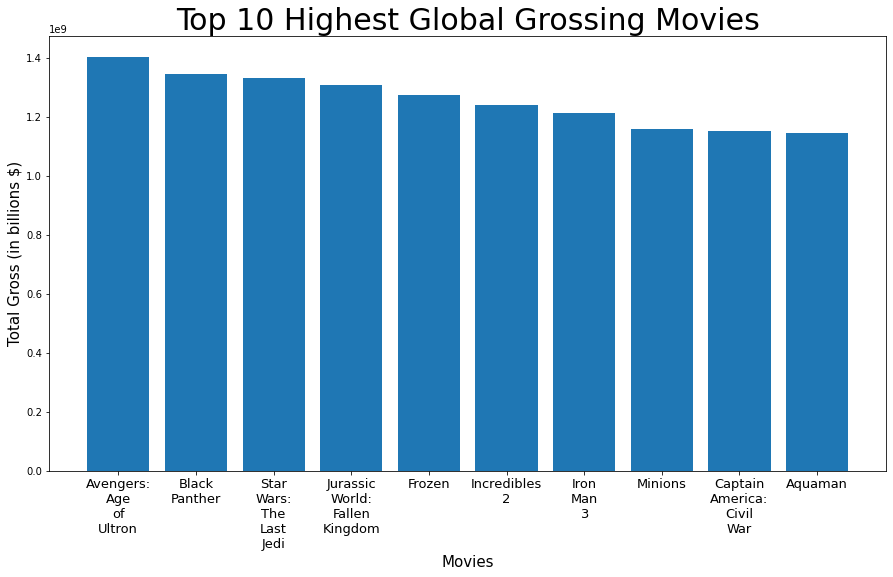

In [72]:
#Create bar chart showing Top 10 Global Grossing Movies
x = query_list.index
y = query_list.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Top 10 Highest Global Grossing Movies', fontsize=30)
ax.set_xlabel('Movies', fontsize=15)
ax.set_ylabel('Total Gross (in billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

# 8. Generate another bar plot

In the cell below, create a sorted bar chart displaying the most popular genres within the Top 10 Highest Global Grossing Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Most Popular Genres From Highest Global Grossing Movies`
3. A ylabel set to `Total Genre Count`
4. An xlabel set to `Genres`

In [73]:
query = query.head(10)
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09
1697,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,417700000.0,891800000.0,1.309500e+09
617,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,400700000.0,875700000.0,1.276400e+09
1698,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,608600000.0,634200000.0,1.242800e+09
618,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,409000000.0,805800000.0,1.214800e+09
1019,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,336000000.0,823400000.0,1.159400e+09
1253,tt3498820,Captain America: Civil War,"Action,Adventure,Sci-Fi",BV,2016,408100000.0,745200000.0,1.153300e+09
1699,tt1477834,Aquaman,"Action,Adventure,Fantasy",WB,2018,335100000.0,812700000.0,1.147800e+09


In [74]:
query['new_genres'] = query['genres'].str.split(',',3)

In [75]:
query = query.explode('new_genres')

In [76]:
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross,new_genres
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Action
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Adventure
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Sci-Fi
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Action
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Adventure
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Sci-Fi
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Action
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Adventure
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Fantasy
1697,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,417700000.0,891800000.0,1.309500e+09,Action


In [77]:
query = query.head(query.shape[0] -1)
query

,tconst,title,genres,studio,year,domestic_gross,foreign_gross,total_gross,new_genres
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Action
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Adventure
1018,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,459000000.0,946400000.0,1.405400e+09,Sci-Fi
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Action
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Adventure
1696,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,700100000.0,646900000.0,1.347000e+09,Sci-Fi
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Action
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Adventure
1499,tt2527336,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",BV,2017,620200000.0,712400000.0,1.332600e+09,Fantasy
1697,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,417700000.0,891800000.0,1.309500e+09,Action


In [78]:
query_genres = query.groupby('new_genres')['total_gross'].count()
query_genres

new_genres
Action        8
Adventure    10
Animation     3
Comedy        2
Fantasy       1
Sci-Fi        5
Name: total_gross, dtype: int64

In [79]:
query_ordered = query_genres.sort_values(ascending=False)
query_ordered

new_genres
Adventure    10
Action        8
Sci-Fi        5
Animation     3
Comedy        2
Fantasy       1
Name: total_gross, dtype: int64

In [80]:
query_ordered.index

Index(['Adventure', 'Action', 'Sci-Fi', 'Animation', 'Comedy', 'Fantasy'], dtype='object', name='new_genres')

In [81]:
query_ordered.values

array([10,  8,  5,  3,  2,  1], dtype=int64)

<ipython-input-82-923d87734f2c>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


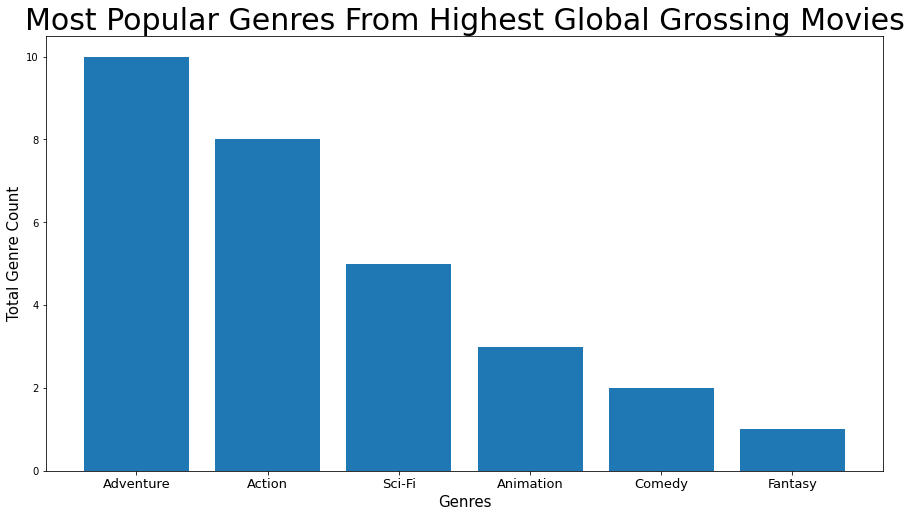

In [82]:
x = query_ordered.index
y = query_ordered.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Most Popular Genres From Highest Global Grossing Movies', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Total Genre Count', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)

**Note:** Even though "Drama" would still be the most popular genre under this bar plot, they're errors in this database because two of the movies had "None" under the `genres` and `new_genres` column.